# Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import  linear_model, metrics
from sklearn import preprocessing

# Read your data.

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Find the null or missing values.

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that Age , Cabin, Embarked column contains null value or missing value.

Text(0.5, 1.0, 'Missing values Heatmap')

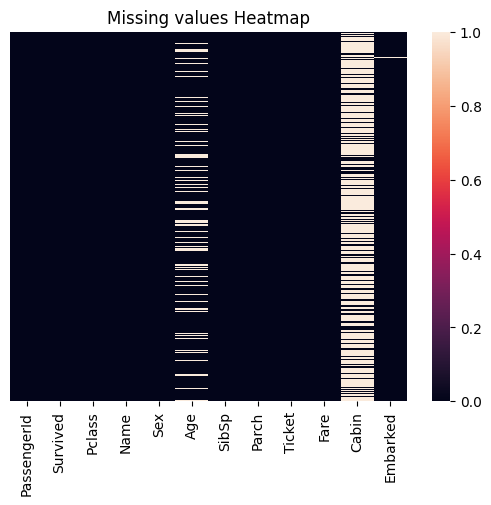

In [6]:
sns.heatmap(df.isnull(), yticklabels=False).set_title("Missing values Heatmap")

Here we can see missing value presnt in Age, Cabin, Embarked column with the help of heatmap.

In [7]:
df.drop(['Cabin'],axis=1,inplace=True)

Here we are dropping the Cabin column because it contains lots of missing values.

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#  Data Cleaning.

Filling the missing value with the help of mean, meadian or mode.

In [9]:
df['Age']= df['Age'].fillna(df['Age'].median())

Text(0.5, 1.0, 'Missing values Heatmap')

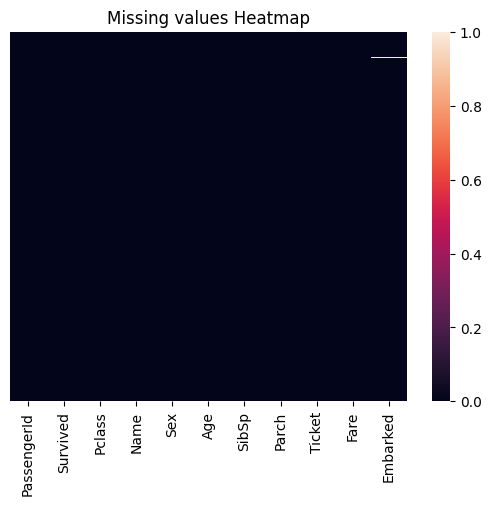

In [10]:
sns.heatmap(df.isnull(), yticklabels=False).set_title("Missing values Heatmap")

Here we can see that after filling the missing values, there is no missing value in data, except Embarked column because it is in categorical form, so we will do it later on while converting all categorical features into numerical.

# Exploratory Data Analysis.

In [11]:
Survived = df['Survived'].value_counts()

In [12]:
Survived.index

Int64Index([0, 1], dtype='int64')

In [13]:
Survived.values

array([549, 342], dtype=int64)

Here we are counting the values in survived columns.

In [14]:
px.pie(data_frame = Survived, names = Survived.index, values = Survived.values)

Here with the help of pie chart we can see that 61.6% people have survived and 38.4% not survived.(0-- not survived, 1-- survived.)

<AxesSubplot: xlabel='Survived', ylabel='count'>

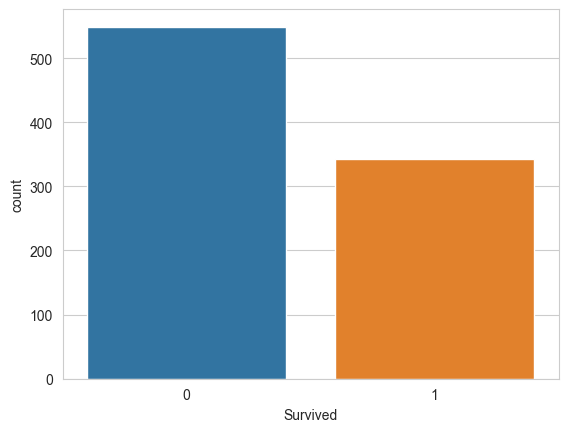

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)


Here with the help of count plot we can see the survival rate. 

<AxesSubplot: xlabel='Survived', ylabel='count'>

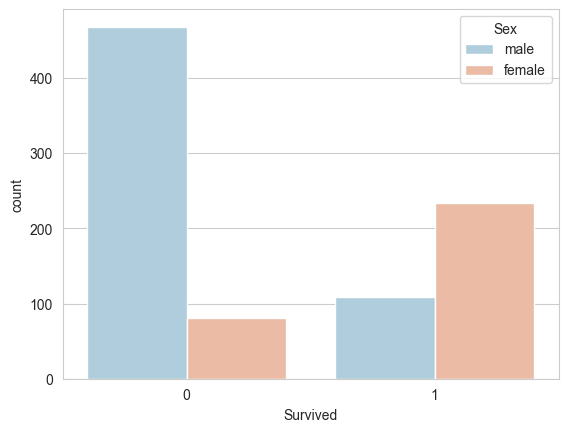

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data= df,palette='RdBu_r')

Here we can see the survival rate of male and female , and it shows that females have survived most than males.

<AxesSubplot: xlabel='Survived', ylabel='count'>

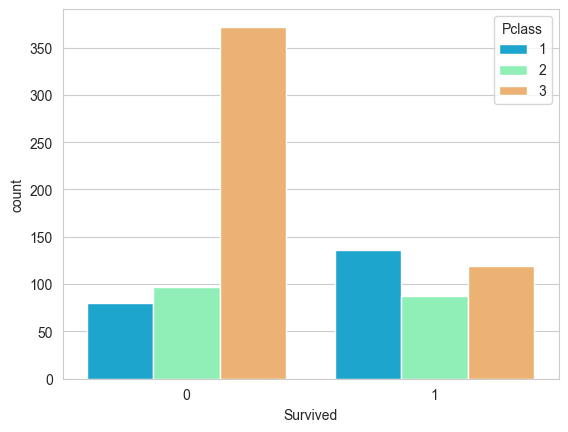

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

It shows that 1st and 2nd  passenger class people are survived most than the 3rd class. 

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18012\3706489216.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Age'>

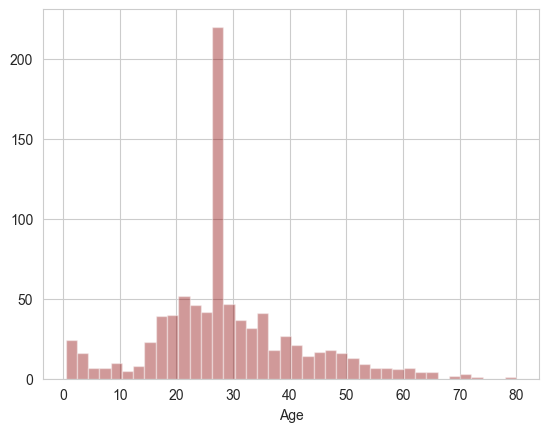

In [18]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

It shows that between the age of 28-30 most of the people have died.

<AxesSubplot: >

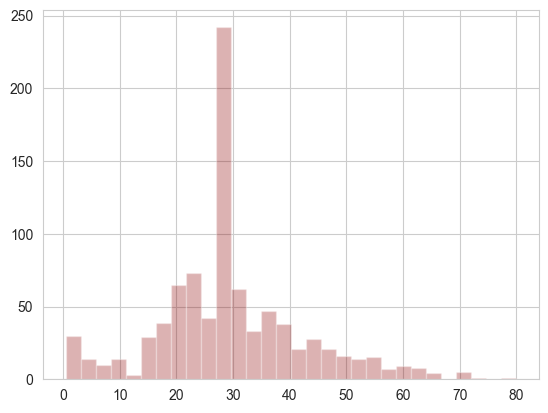

In [19]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

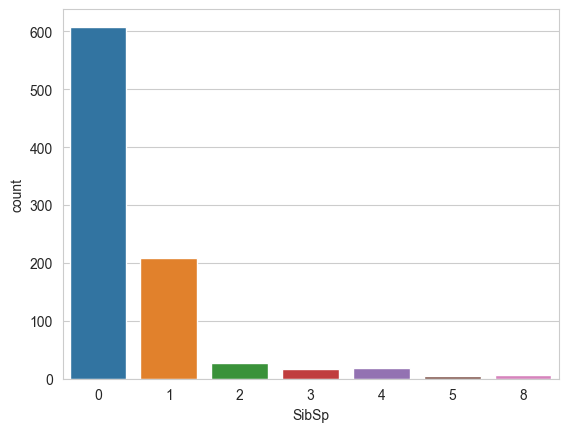

In [20]:
sns.countplot(x='SibSp',data=df)

Here we can see that people with 0 sibling spouce have survived most in comparision to 1,2,3,4 and so on.

<AxesSubplot: >

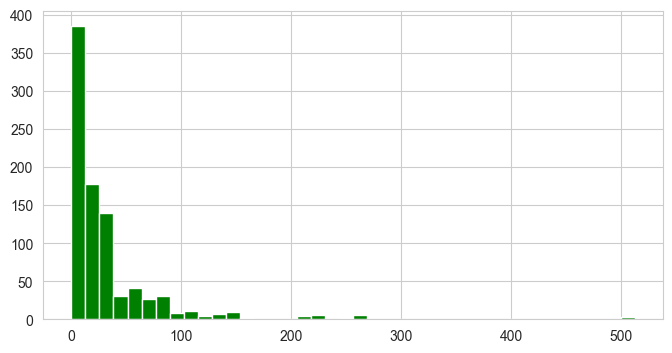

In [21]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

It shows the average fair who baught the ticket.

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18012\1717366647.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



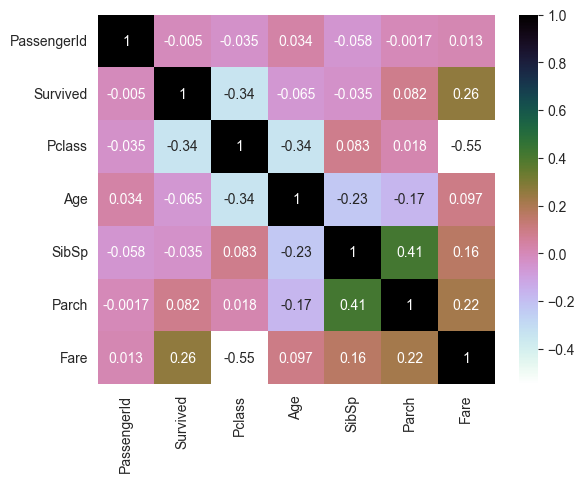

In [22]:
sns.heatmap(df.corr(), annot = True, cmap= 'cubehelix_r')
plt.show()

This heatmap shows that Fare and Age are highly correlated with each other.

# Converting Categorical to Numerical.

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
le = LabelEncoder()

In [24]:
df['Sex']= le.fit_transform(df['Sex'])

In [25]:
df.dropna(inplace=True)

In [26]:
df['Emabrked']= le.fit_transform(df['Embarked'])

Here we are converting our categorical data into numerical data with the help of Label Encoding.

In [27]:
df.drop(['PassengerId','Name','Ticket','Embarked'],axis= 1, inplace= True)

Here we are dropping the features which are not required.

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emabrked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


As we can see that we have converted the categorical data into numerical with the help of Label Encoding. 

In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Emabrked    0
dtype: int64

Here we can see that there is no missing value in our data , not in even Embarked column.

Text(0.5, 1.0, 'Missing values Heatmap')

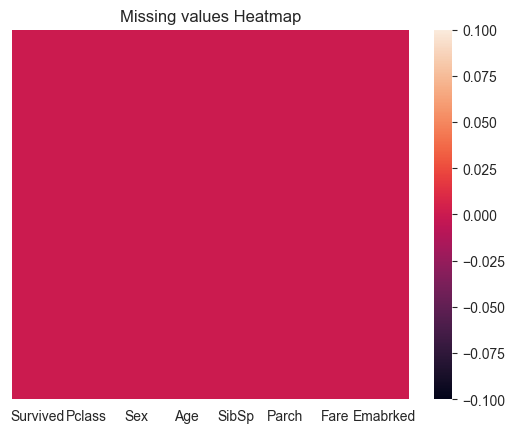

In [30]:
sns.heatmap(df.isnull(), yticklabels=False).set_title("Missing values Heatmap")

It shows that there is no missing value is present in our data.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Emabrked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.6 KB


Here we can see that our categorical data is been converted into numerical data. 

In [32]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.508010
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Emabrked   -1.261367
dtype: float64

This shows that our data is skewed or not, It is desirable that for the normal distribution of data the values of skewness should be near to 0.

Text(0.5, 1.0, 'Distribution of Parch')

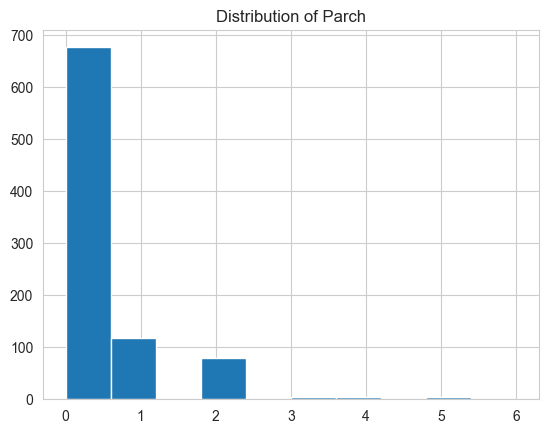

In [33]:
df['Parch'].hist()
plt.title('Distribution of Parch')

Here we can see that our data is right skewed and it does not follows normal distribution.

Text(0.5, 1.0, 'Distribution of Pclass')

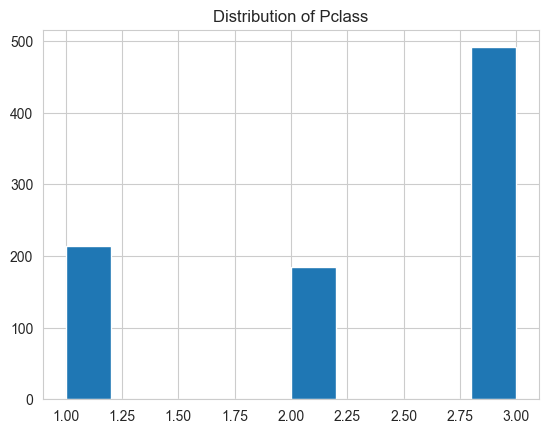

In [34]:
df['Pclass'].hist()
plt.title('Distribution of Pclass')

It shows that our data is left Skewed and it does not follows normal distribution.

Text(0.5, 1.0, 'Distribution of SibSp')

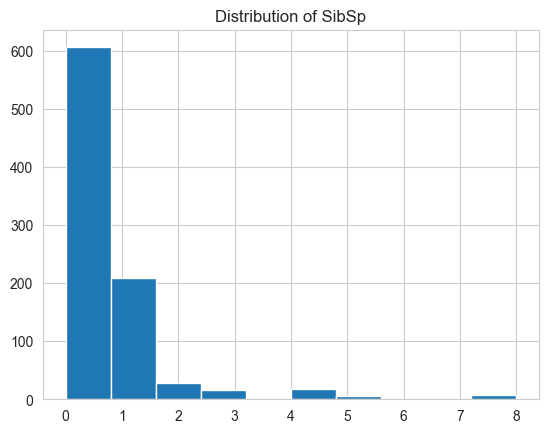

In [35]:
df['SibSp'].hist()
plt.title('Distribution of SibSp')

It shows that our data is right skewed and it does not follows normal distribution.

<AxesSubplot: xlabel='Parch', ylabel='Density'>

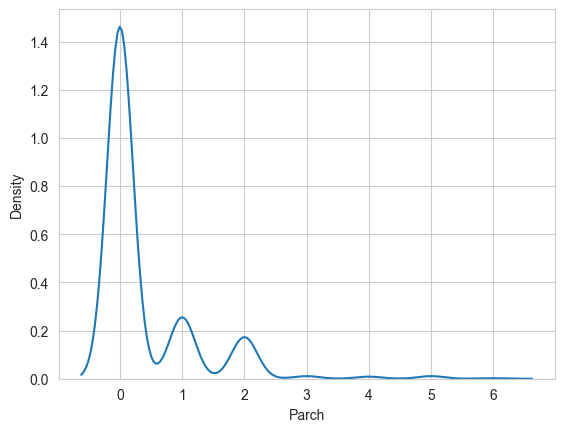

In [36]:
sns.kdeplot(df['Parch'])

Kde plot shows that our data is right skewed and it does not follows normal distribution.

# Checking the distribution of variables using a Q-Q (quantile quantile)plot.

In [37]:
import scipy.stats as stats
import pylab

((array([-3.16351215e+00, -2.89566187e+00, -2.74601536e+00, -2.64038499e+00,
         -2.55792154e+00, -2.48987563e+00, -2.43171381e+00, -2.38077264e+00,
         -2.33534957e+00, -2.29428798e+00, -2.25676508e+00, -2.22217393e+00,
         -2.19005361e+00, -2.16004554e+00, -2.13186508e+00, -2.10528238e+00,
         -2.08010906e+00, -2.05618875e+00, -2.03339015e+00, -2.01160192e+00,
         -1.99072878e+00, -1.97068857e+00, -1.95140991e+00, -1.93283036e+00,
         -1.91489501e+00, -1.89755528e+00, -1.88076799e+00, -1.86449459e+00,
         -1.84870046e+00, -1.83335448e+00, -1.81842849e+00, -1.80389695e+00,
         -1.78973664e+00, -1.77592637e+00, -1.76244673e+00, -1.74927992e+00,
         -1.73640957e+00, -1.72382059e+00, -1.71149902e+00, -1.69943195e+00,
         -1.68760738e+00, -1.67601417e+00, -1.66464194e+00, -1.65348100e+00,
         -1.64252232e+00, -1.63175741e+00, -1.62117835e+00, -1.61077766e+00,
         -1.60054837e+00, -1.59048386e+00, -1.58057792e+00, -1.57082470e+00,

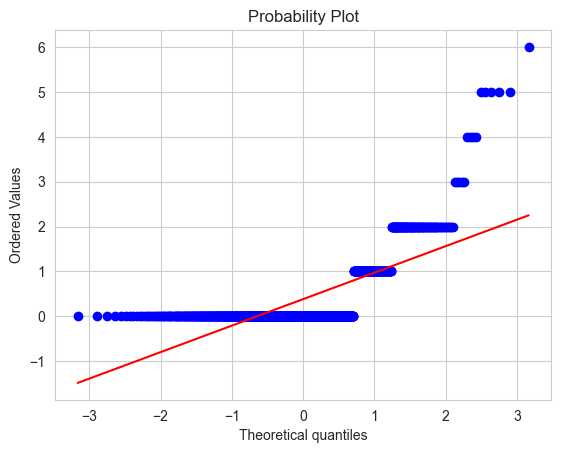

In [38]:
stats.probplot(df['Parch'], plot = pylab)

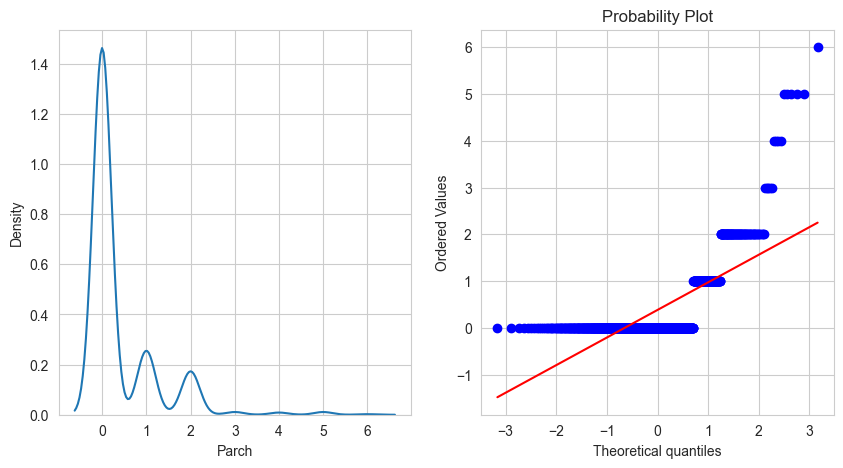

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['Parch'])
plt.subplot(1,2,2)
stats.probplot(df['Parch'],plot=pylab)
plt.show()

In [40]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emabrked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Seperating the output. 

In [41]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

print("Shape of X", X.shape)
print("Shape of y:", y.shape)

Shape of X (889, 7)
Shape of y: (889,)


In [42]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

# Train_Test_Slipt. 

In [43]:
# splitting the data for model training

# splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)
print("Shape of X_train", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train (595, 7)
Shape of y_train: (595,)
Shape of X_test (294, 7)
Shape of y_test: (294,)


Here we are splitting the training data and testing data.

# Normalization.

Because our data does not follow normal distribution.

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

In [46]:
X_train1

array([[0.        , 1.        , 0.67328474, ..., 0.        , 0.10122886,
        1.        ],
       [0.5       , 0.        , 0.42196532, ..., 0.        , 0.02537431,
        1.        ],
       [0.        , 1.        , 0.04498618, ..., 0.33333333, 0.15977676,
        1.        ],
       ...,
       [0.        , 0.        , 0.59788892, ..., 0.        , 0.05061043,
        1.        ],
       [1.        , 0.        , 0.25860769, ..., 0.33333333, 0.06709553,
        1.        ],
       [1.        , 1.        , 0.40939935, ..., 0.        , 0.01689187,
        1.        ]])

A we can see that Normalization has been complted and it has given the value between 0 and 1.

# Using an algorithm to find the accuracy (Logistic Regression).

In [47]:
reg = linear_model.LogisticRegression()
   
# train the model using the training sets
reg.fit(X_train1, y_train)
  
# making predictions on the testing set
y_pred = reg.predict(X_test1)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 80.27210884353741


As we can see here it has given the accuracy of 80 % which means its preety good, but i have not removed the outlier , otherwise we will be getting the accuracy till 90%.

# Confusion Matrix.

It is very important , because it helps us know the performance of the model.

<AxesSubplot: >

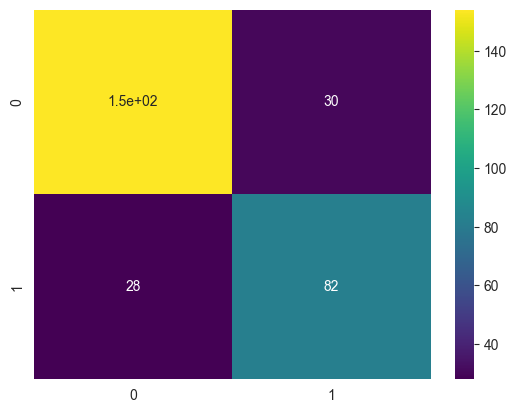

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'viridis')

This is the confusion matrix.

In [49]:
#y_test = np.random.binomial(1,.9,size = 1000)
#y_pred = np.random.binomial(1,.9,size = 1000)

#confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

#cm_display.plot()
#plt.show()

In [50]:
#Accuracy = metrics.accuracy_score(y_test, y_pred)*100

In [51]:
#Accuracy

In [52]:
#Precision = metrics.precision_score(y_test, y_pred)*100

In [53]:
#Sensitivity_recall = metrics.recall_score(y_test, y_pred)*100

In [54]:
#Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)*100

In [55]:
#F1_score = metrics.f1_score(y_test, y_pred)*100

In [56]:
#metrics
#print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

Actually here we don't need cunfusion matrix but incase for knowleedge purpose i have written the code.  

# Random forest .

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train1, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test1)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)

ACCURACY OF THE MODEL:  76.87074829931973


Here we have the accuracy of 77%, so we will go with logistic regression for now.

# Knn(k- nearest neighbors).

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.model_selection import cross_validate

In [60]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
knn.score(X_test,y_test)*100

69.04761904761905

In [62]:
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

Here we have to give the range how much is necessary.

In [63]:
for i,k in enumerate(neighbors):
         knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)

Here we are training and testing the data and storing it into a new objet.

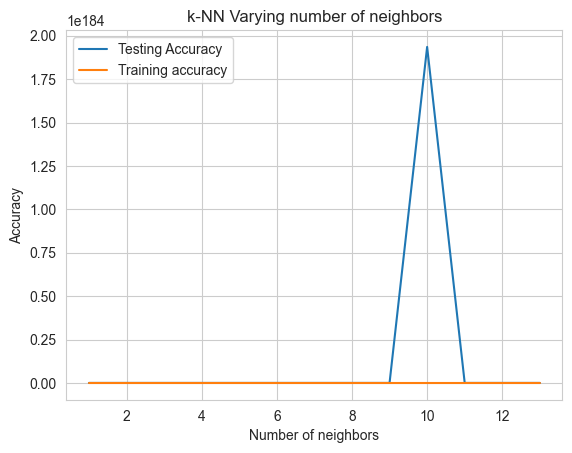

In [64]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

After plotting the graph we can see that from 8th range the testing accuracy is rising and from between 8 and 10 which means 9 it started decreasing, so this means our best value for finding the accuracy is 9.  

In [65]:
knn = KNeighborsClassifier(n_neighbors=9)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [67]:
knn.score(X_test,y_test)*100

72.78911564625851

Here we can see that our accuracy is 73%, again which  is less comapred to logistic regression , so i will go with logistic regression.

# Dumping the file.

In [68]:
from re import template
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from joblib import dump, load

In [69]:
pickle.dump(reg, open('model.pkl','wb'))

Here our whole model is completed so i will dump this file and go for Flask API .